## Data pull, parsing and preliminary modeling
#### CS109a - Sam, Luke, Jake, Jeremy
#### Chicago Food Inspection Forecasting
#### Last Updated: 11/28/16

In [ ]:
from download import main

In [ ]:
import datetime
import optparse
import requests
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from sys import exit
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
main(date=datetime.datetime.strptime('01/01/2010', '%m/%d/%Y'), export=True)

First we load in the data:

In [1]:
import datetime
import optparse
import requests
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from sys import exit
import math
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('DOWNLOADED_DATA.csv')


**NEW**

In [2]:

result_possibilities = ['Pass', 'Fail', 'Pass w/ Conditions']
valid_result_bools = [result in result_possibilities for result in data.results]
data = data[valid_result_bools]

Now we check out the columns:

These functions build binary indicators for license types 

In [3]:
def fail(result):
    if 'Fail' in result:
        return 1
    else:
        return 0
    
    
def grocery_store(facility_type):
    if 'Grocery Store' == facility_type:
        return 0
    else:
        return 1

In [4]:
data['result_binary'] = [fail(result) for result in data.results]
data['grocery'] = [grocery_store(facility_type) for facility_type in data.facility_type]

**NEW**

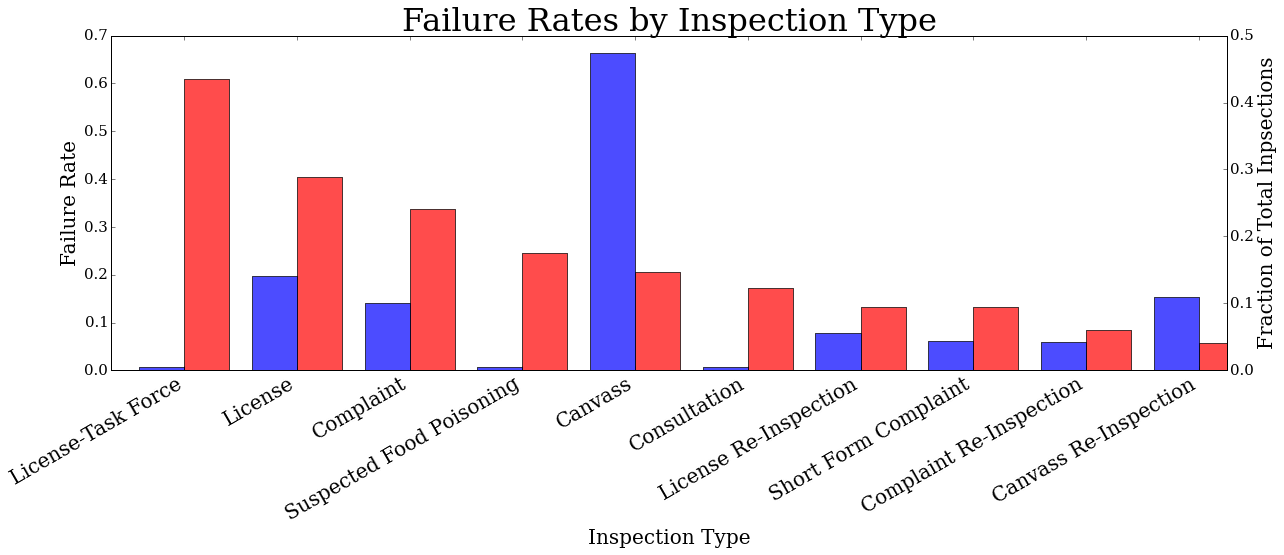

In [6]:
top_inspection_types = data.groupby('inspection_type').count().result_binary.sort_values(ascending=False).index[:10]
top_inspection_types_sorted = data.groupby('inspection_type').mean().result_binary[top_inspection_types].sort_values(ascending=False).index

fig = plt.figure(figsize=(20,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

plt.rc('font', family='serif')
plt.rc('font', family='serif')


data.groupby('inspection_type').mean().result_binary[top_inspection_types].sort_values(ascending=False).plot(kind='bar',color='r',ax = ax, alpha=0.7,width=width,position=0)
percentage_1 = data.groupby('inspection_type').count().result_binary[top_inspection_types_sorted]/len(data)
percentage_1.plot(kind='bar',color='b',ax = ax2, alpha=0.7,width=width,position=1)
ax.set_ylabel('Failure Rate',fontsize = 20)
ax2.set_ylabel('Fraction of Total Inpsections',fontsize = 20)
ax.set_xlabel('Inspection Type',fontsize = 20)
plt.title('Failure Rates by Inspection Type',fontsize = 32)
ax.set_xticklabels(labels = top_inspection_types_sorted, ha = 'right')


for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')
                tick.label.set_rotation(30)

              
                
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(15) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 

for label2 in ax2.yaxis.get_majorticklabels():
                label2.set_fontsize(15) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')  


**NEW**

In [7]:
inspection_type_dummies = pd.get_dummies(data['inspection_type'])
inspection_type_dummies = inspection_type_dummies[top_inspection_types]


data = pd.concat([data,inspection_type_dummies],axis=1,join='inner')


biz_cols = []
for col in data.columns:
    if 'business_activity' in col:
        biz_cols.append(col)
        
count = []
mean = []
for col in biz_cols:
    mean.append(data[data[col] == 1].result_binary.mean())
    count.append(len(data[data[col] == 1].result_binary))

In [ ]:
biz_cols_count_top
#[','Live Performance', ]

**NEW**

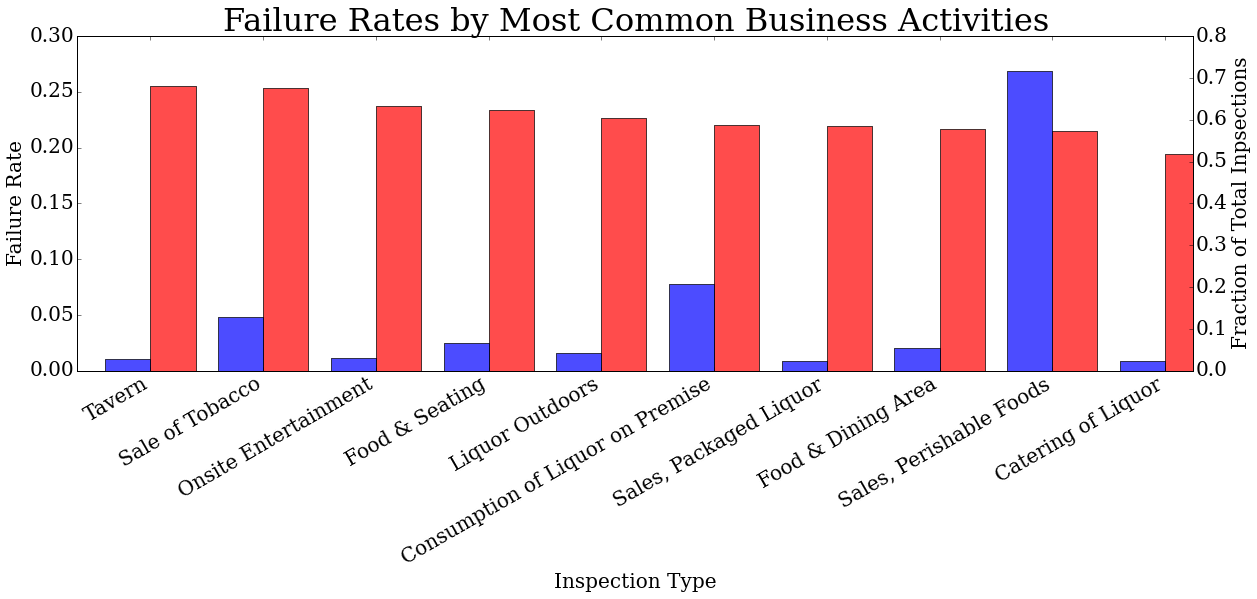

In [8]:
biz_cols_mean = pd.Series(mean,biz_cols)
biz_cols_count = pd.Series(count,biz_cols)

biz_cols_count_top = biz_cols_count.sort_values(ascending=False).index[:10]


biz_col_mean_sorted = biz_cols_mean[biz_cols_count_top].sort_values(ascending=False).index

fig = plt.figure(figsize = (20,6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

biz_cols_mean[biz_col_mean_sorted].sort_values(ascending=False).plot(kind='bar',color='r',ax = ax, alpha=0.7,width=width,position=0)
percentage = biz_cols_count[biz_col_mean_sorted]/len(data)
percentage.plot(kind='bar',color='b',ax = ax2, alpha=0.7,width=width,position=1)



ax.set_ylabel('Failure Rate',fontsize = 20)
ax2.set_ylabel('Fraction of Total Inpsections',fontsize = 20)
ax.set_xlabel('Inspection Type',fontsize = 20)
plt.title('Failure Rates by Most Common Business Activities',fontsize = 32)

ax.xaxis.set_ticklabels(['Tavern',
 'Sale of Tobacco', 
 'Onsite Entertainment', 
 'Food & Seating',
 'Liquor Outdoors',
 'Consumption of Liquor on Premise',
 'Sales, Packaged Liquor',
 'Food & Dining Area',
 'Sales, Perishable Foods',
 'Catering of Liquor'],fontsize = 20, ha = 'right')


for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')
                tick.label.set_rotation(30)

              
                
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 

for label2 in ax2.yaxis.get_majorticklabels():
                label2.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')  
plt.show()

In [ ]:
print ax2

In [ ]:


pass_rate = []
count = []
for col in license_cols:
    pass_rate.append(data[data[col] == 1].result_binary.mean())
    pass_rate.append(data[data[col] == 1].result_binary.mean())

In [ ]:
biz_cols_counts = data[biz_cols].sum().sort_values()

In [ ]:
top_n = 20
top_license_counts = biz_cols_counts.ix[biz_cols_counts.index[-top_n:]]

In [ ]:

top_biz_counts_cols = list(biz_cols_counts.index[-top_n:])

pass_rate = []
for col in top_biz_counts_cols:
    pass_rate.append(data[data[col] == 1].result_binary.mean())
    
top_biz_pass_rate = pd.Series(data = np.array(pass_rate),index=top_biz_counts_cols)

In [ ]:
pd.DataFrame(1-top_biz_pass_rate).plot(kind='bar')
plt.show()
pd.DataFrame(top_license_counts).plot(kind='bar')
plt.show()

In [ ]:
keep_n=5
all_license_cols = list(biz_cols)
for col in list(biz_cols_counts.index[-keep_n:]):
    all_license_cols.remove(col)

drop_license_cols = all_license_cols
data = data.drop(drop_license_cols,axis=1)

In [ ]:
data['inspection_date'] = pd.to_datetime(data['inspection_date'])
#data['license_start_date'] = pd.to_datetime(data['license_start_date'])
#data['date_issued'] = pd.to_datetime(data['date_issued'])
data['creation_date'] = pd.to_datetime(data['creation_date'])

In [ ]:
weather_data_ohare = pd.read_csv('Ohare Weather Data.csv')
weather_data_midway = pd.read_csv('Midway Weather Data.csv')
weather_data_ohare['inspection_date'] = [datetime.datetime.strptime(str(DATE), '%Y%m%d') for DATE in weather_data_ohare.DATE]
weather_data_midway['inspection_date'] = [datetime.datetime.strptime(str(DATE), '%Y%m%d') for DATE in weather_data_midway.DATE]
temp_data_ohare = weather_data_ohare.set_index(['inspection_date'])[['TMAX']]
temp_data_midway = weather_data_midway.set_index(['inspection_date'])[['TMAX']]

temp_data_ohare['TMAX_3DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,3)
temp_data_ohare['TMAX_10DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,10)
temp_data_ohare['TMAX_30DayAvg'] = pd.rolling_mean(temp_data_ohare.TMAX,30)

temp_data_midway['TMAX_3DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,3)
temp_data_midway['TMAX_10DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,10)
temp_data_midway['TMAX_30DayAvg'] = pd.rolling_mean(temp_data_midway.TMAX,30)
data = data.join(temp_data_midway, on='inspection_date')

In [ ]:
import re

critical_flags = re.compile(r'(\bCRITICAL\b)',flags = re.IGNORECASE)
serious_flags = re.compile(r'(\bSERIOUS\b)',flags = re.IGNORECASE)
citation_flags = re.compile(r'(\bCITATION\b)',flags = re.IGNORECASE)
violation_flags = re.compile(r'(\bVIOLATION\b)',flags = re.IGNORECASE)
minor_flags = re.compile(r'(\bMINOR\b)',flags = re.IGNORECASE)
corrected_flags = re.compile(r'(\bCORRECTED\b)',flags = re.IGNORECASE)


In [ ]:
data[data['violations'].isnull()]

In [ ]:
data[data.license_ == data.ix[0].license_ ]

In [ ]:
violations_count = []
citations_count = []
critical_count = []
serious_count = []
minor_count = []
corrected_count = []

LOG_EVERY_N = 10000


  
for index in data.index[0:5]:
    text = data.ix[index].violations
    
    if type(text) == type(' '):
        violations_count.append(violation_flags.subn('',text)[1])
        citations_count.append(citation_flags.subn('',text)[1])
        critical_count.append(critical_flags.subn('',text)[1])
        serious_count.append(serious_flags.subn('',text)[1])
        minor_count.append(minor_flags.subn('',text)[1])
        corrected_count.append(corrected_flags.subn('',text)[1])


    else:
        violations_count.append(float('nan'))
        citations_count.append(float('nan'))
        critical_count.append(float('nan'))
        serious_count.append(float('nan'))
        minor_count.append(float('nan'))
        corrected_count.append(float('nan'))

        
    if (index % LOG_EVERY_N) == 0:
        print index


In [ ]:
data['violations_count'] = violations_count
data['citations_count'] = citations_count
data['critical_count'] = critical_count
data['serious_count'] = serious_count
data['minor_count'] = minor_count
data['corrected_count'] = corrected_count




In [ ]:
def prev_inspection_features(data,inspection_id,date):
    current_inspection = data.ix[data[data.inspection_id==inspection_id].index[0]]
    
    all_inspections = data[data.license_ == current_inspection.license_]
    
    previous_inspections = all_inspections[all_inspections.inspection_date < date]
    if len(previous_inspections) >= 1:
        last_inspection_index = previous_inspections.inspection_date.sort_values().index[-1]
        fraction = previous_inspections.result_binary.mean()
        count = previous_inspections.result_binary.count()
        last = previous_inspections.result_binary[last_inspection_index]
        
        #if type(pd.to_datetime('nan')) != type(current_inspection.license_start_date):
        #    license_age = current_inspection.inspection_date - current_inspection.license_start_date
        #    license_age = license_age.days
        #    if license_age <= 0:
        #        license_age = 0
        #else:
        #    license_age = float('nan')
            
        time_since_last = current_inspection.inspection_date - previous_inspections.ix[last_inspection_index].inspection_date
        time_since_last = time_since_last.days
        
        prev_violations = previous_inspections.violations_count[last_inspection_index]
        prev_citations = previous_inspections.citations_count[last_inspection_index]
        prev_critical = previous_inspections.critical_count[last_inspection_index]
        prev_serious = previous_inspections.serious_count[last_inspection_index]
        prev_minor = previous_inspections.minor_count[last_inspection_index]
        prev_corrected = previous_inspections.corrected_count[last_inspection_index]

        
        
        
    else:
        fraction = float('nan')
        count = 0
        last = float('nan')
        license_age = float('nan')
        time_since_last = float('nan')
        prev_violations = float('nan')
        prev_citations = float('nan')
        prev_critical = float('nan')
        prev_serious = float('nan')
        prev_minor = float('nan')
        prev_corrected = float('nan')

        
        
        
        
    return np.array([count,
                     fraction,
                     last,
                     #license_age,
                     time_since_last,
                     prev_violations,
                     prev_citations,
                     prev_critical,
                     prev_serious,
                     prev_minor,
                     prev_corrected])
    
    


In [ ]:
#previous_inspection_features = np.zeros((len(data.index),11))

previous_inspection_features = np.zeros((len(data.index),10))


LOG_EVERY_N = 10000
for index in data.index:
    previous_inspection_features[index,:] = prev_inspection_features(data,data.ix[index].inspection_id,data.ix[index].inspection_date)
    if (index % LOG_EVERY_N) == 0:
        print index


In [ ]:
    
data['previous_count'] = previous_inspection_features[:,0]
data['previous_fraction'] = previous_inspection_features[:,1]
data['previous_result'] = previous_inspection_features[:,2]
#data['license_age'] = previous_inspection_features[:,3]
data['time_since_last_inspection'] = previous_inspection_features[:,3]
data['previous_violations'] = previous_inspection_features[:,4]
data['previous_citations'] = previous_inspection_features[:,5]
data['previous_critical'] = previous_inspection_features[:,6]
data['previous_serious'] = previous_inspection_features[:,7]
data['previous_minor'] = previous_inspection_features[:,8]
data['previous_corrected'] = previous_inspection_features[:,9]



In [ ]:
for col in data.columns:
    print col

In [ ]:
data.to_csv('data_built_features.csv',index=False)

In [ ]:

#adjust number of buckets using np.linspace ----------------->
yedges = np.linspace(data.longitude.min(),data.longitude.max(),6)
xedges = np.linspace(data.latitude.min(),data.latitude.max(),6)

x = np.array(data.latitude)
y = np.array(data.longitude)

x1 = np.array(data[data.result_binary == 1].latitude)
y1 = np.array(data[data.result_binary == 1].longitude)

x0 = np.array(data[data.result_binary == 0].latitude)
y0 = np.array(data[data.result_binary == 0].longitude)


hist0, xedges, yedges = np.histogram2d(x0, y0, (xedges, yedges))
hist1, xedges, yedges = np.histogram2d(x1, y1, (xedges, yedges))

hist = hist0/(hist1+hist0)
hist_count = hist1+hist0

xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)

c = hist[xidx, yidx]
plt.scatter(x, y, c=c)

plt.show()

sorted_index = np.argsort(hist.reshape(1,-1))

print hist_count.reshape(1,-1)[0][sorted_index[0]]
print hist.reshape(1,-1)[0][sorted_index[0]]

In [ ]:
data['bin_index'] = hist.shape[1]*yidx + xidx

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('bin_index').count().result_binary.plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('bin_index').mean().result_binary.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()

In [ ]:
result_index = data.groupby('license_description').mean().result_binary.sort_values().index
data.groupby('license_description').mean().result_binary.sort_values()[result_index]

In [ ]:

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('license_description').count().result_binary[result_index].plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('license_description').mean().result_binary.sort_values()[result_index].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()



In [ ]:
top_50 = data.groupby('facility_type').count().result_binary.sort_values().index[-50:]

In [ ]:
data.groupby('facility_type').mean().result_binary[top_50].sort_values()

top_50count_mean_sorted_index = data.groupby('facility_type').mean().result_binary[top_50].sort_values().index



In [ ]:

fig = plt.figure(figsize=(10,10)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4


data.groupby('facility_type').mean().result_binary[top_50].sort_values().plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.groupby('facility_type').count().result_binary[top_50count_mean_sorted_index].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


plt.show()


#### Baseline modeling

In [ ]:
# Simple averaging

simple_avg_classifier = []

for frac in data.previous_fraction:
    if frac > 0.5:
        simple_avg_classifier.append(1)
    elif frac < 0.5:
        simple_avg_classifier.append(1)
    
    else:
        simple_avg_classifier.append(np.random.choice([0,1]))
        
print np.mean(np.array(simple_avg_classifier) == data.result_binary)

In [ ]:
cols = ['results', 
        'result_binary', 
        'risk', 
        'sanit_count', 
        'crime_count', 
        'consumption_license', 
        'tobacco', 
        'grocery', 
        'previous_count',
        'minor_count',
        'previous_fraction', 
        'previous_result', 
        'license_age', 
        'time_since_last_inspection', 
        'previous_violations', 
        'previous_citations', 
        'previous_critical', 
        'previous_serious', 
        'previous_minor', 
        'bin_index']

print data[cols].shape
print data.shape

# select specific features
data_sub = data[cols]
# drop NaN
data_sub = data_sub.dropna(axis=0)

In [ ]:
# check response
print 'Useless response count:', sum((data_sub.results != 'Pass') & (data_sub.results != 'Pass w/ Conditions') & (data_sub.results != 'Fail'))
indices = (data_sub.results == 'Pass') | (data_sub.results == 'Pass w/ Conditions') | (data_sub.results == 'Fail')
data_sub = data_sub[indices]

In [ ]:
# response
y2 = data_sub.result_binary
y3 = data_sub.results
# features
x = data_sub.drop(['result_binary', 'results'], axis = 1) 

# print data_sub.shape, data_sub_x.shape, data_sub_y_2, data_sub_y_3

In [ ]:
# encode
x_encoded = pd.DataFrame({})
for column in x.columns:
    if (x[column].unique().shape[0] < 8) or x[column].dtype == np.dtype('object'):
        encoding = pd.get_dummies(x[column])
        x_encoded = pd.concat([x_encoded, encoding], axis = 1)
    else:
        x_encoded = pd.concat([x_encoded, x[[column]].astype(float)], axis = 1)

In [ ]:
from sklearn import linear_model

baseline = linear_model.LogisticRegression()
baseline.fit(x_encoded, y2)
print baseline.score(x_encoded, y2)

baseline = linear_model.LogisticRegression(solver='newton-cg', multi_class = 'multinomial')
baseline.fit(x_encoded, y3)
print baseline.score(x_encoded, y3)

In [ ]:
# arbitary split
from sklearn.cross_validation import train_test_split as sk_split
test_size = 0.20
x_train, x_test, y2_train, y2_test = sk_split(x_encoded, y2, test_size = test_size)

baseline = linear_model.LogisticRegression()
baseline.fit(x_train, y2_train)
print 'Score:', baseline.score(x_test, y2_test)
print 'Score for passing inspections:', baseline.score(x_train[y2_train == 1], y2_train[y2_train == 1])
print 'Score for non-passing inspections:', baseline.score(x_train[y2_train == 0], y2_train[y2_train == 0])

In [ ]:
# class counts in training set

print 'Count did not pass:', sum(y2_train == 0)
print 'Count did pass:', sum(y2_train == 1)

In [ ]:
# quick fix for imbalance

# takes x_train, y_train and returns a class-balanced x_train, y_train 
# assumes count of class 0 > count of class 1
def subsample(x_train, y_train):
    train = pd.concat([x_train, y_train], axis = 1)

    train_0 = train[y_train == 0]
    train_1 = train[y_train == 1]
    
    train_1_subsample = train_1.sample(train_0.shape[0])
    
    train_subsample = pd.concat([train_1_subsample, train_0], axis = 0)
    
    x_train_subsample = train_subsample.iloc[:, :-1]
    y_train_subsample = train_subsample.iloc[:, -1]
    
    return x_train_subsample, y_train_subsample
    
## test subsampling algorithm with same simple classifier
x_train_sub, y2_train_sub = subsample(x_train, y2_train)

print x_train_sub.shape
print y2_train_sub.shape


In [ ]:
baseline_cls_corr = linear_model.LogisticRegression()
baseline_cls_corr.fit(x_train_sub, y2_train_sub)
print 'Score:', baseline_cls_corr.score(x_test, y2_test)
print 'Score for passing inspections:',baseline_cls_corr.score(x_test[y2_test == 1], y2_test[y2_test == 1])
print 'Score for non-passing inspections:', baseline_cls_corr.score(x_test[y2_test == 0], y2_test[y2_test == 0])

In [ ]:
results_data = pd.read_csv('pred_prob_for_fails.csv.csv')

In [ ]:
results_data.head()

In [ ]:

from dateutil.relativedelta import relativedelta  
import seaborn
seaborn.set_style(style='white')



def list_rank(true_values,probabilities,data_test):
    result_series = pd.Series(probabilities,true_values).sort_values(ascending=False)
    result_time_series = pd.Series(result_series.index,data_test.inspection_date)
    return result_series,result_time_series
    

def series_running(result_time_series):
    results = np.array(result_time_series.result_binary)
    running_mean = []
    for index in range(len(results)-1):
        running_mean.append(np.mean(results[0:index+1]))
    return pd.Series(running_mean,result_time_series.index[1:])
def fail_days(result_timeseries):
    date_array = np.array(result_timeseries.index)
    result_array = np.array(result_timeseries.result_binary)
    start_date = pd.to_datetime(date_array[0]) - relativedelta(days=1)
    fail_days = 0
    for date_ind in range(len(result_timeseries.index)):
        date = date_array[date_ind]
        delta = pd.to_datetime(date) - start_date
        fail_days += delta.days*result_array[date_ind]
    return fail_days

In [ ]:
test_columns = results_data.columns[-2:]
model_columns = results_data.columns[1:-2]
true_values = results_data[results_data.columns[-1]]
test_data = results_data[test_columns].sort_values('inspection_date')
test_data = test_data.set_index([test_data.inspection_date])


In [ ]:
fail_day_count_mean = []
for model_column in model_columns:
    result_series = results_data[[model_column,'result_binary']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    fail_day_count_mean.append(fail_days(sorted_series)/test_data.result_binary.sum())

In [ ]:
true_fail_days = fail_days(test_data)/test_data.result_binary.sum()
all_cols = list(model_columns)
all_cols.append('Actual')
color_series = pd.Series(['b']*len(model_columns) + ['r'],index = all_cols)
sorted_failday_results = pd.Series(fail_day_count_mean + [true_fail_days],index = all_cols).sort_values(ascending=False)

# color_list =  list(color_series[sorted_failday_results.index])

color_list = ['white' for _ in color_series]
color_list[-1] = 'green'
color_list[0] = 'red'

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(111) # Create matplotlib axes

sorted_failday_results.plot(kind = 'bar',color= color_list,ax = ax1, edgecolor='black',lw=1)


plt.title('Average Days Until Inspection',fontsize=32)
plt.rc('font', family='serif')
plt.xlabel('Model',fontsize=20)
plt.ylabel('Fail Days',fontsize=20)
ax1.set_xticklabels(labels = list(sorted_failday_results.index), ha = 'right')

for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small')
                tick.label.set_rotation(45)
                
                
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 

In [ ]:
best_model_cols = sorted_failday_results.index[0:6]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111) # Create matplotlib axes

for model_column in best_model_cols:
    result_series = results_data[[model_column,'result_binary']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    series_running(sorted_series).plot(ax = ax1)
    
series_running(test_data).plot(legend = True, ax = ax1,color='r')
plt.legend(list(best_model_cols) + ['Actual'],loc=1, bbox_to_anchor=(0.9, 0.95),fontsize = 15)
plt.title('Cumulative Failure Rate For Model Ordering',fontsize=20)
plt.xlabel('Time of Inspection',fontsize=15)
plt.ylabel('Failure Rate',fontsize=15)


In [ ]:
worst_model_cols = sorted_failday_results.index[-7:-1]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111) # Create matplotlib axes

for model_column in worst_model_cols:
    result_series = results_data[[model_column,'result_binary']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    series_running(sorted_series).plot(ax = ax1)
    
series_running(test_data).plot(legend = True, ax = ax1,color='r')
plt.legend(list(worst_model_cols) + ['Actual'],loc=1, bbox_to_anchor=(0.9, 0.95),fontsize = 15)
plt.title('Cumulative Failure Rate For Model Ordering',fontsize=20)
plt.xlabel('Time of Inspection',fontsize=15)
plt.ylabel('Failure Rate',fontsize=15)

In [ ]:
best_model_cols = sorted_failday_results.index[0:6]

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(111) # Create matplotlib axes

for model_column in best_model_cols:
    result_series = results_data[[model_column,'result_binary']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    result_data_rolling_mean = sorted_series.result_binary.rolling(window = 1000).mean()
    result_data_rolling_mean.plot(ax = ax1, legend= True)
    
test_data.result_binary.rolling(window =1000).mean().plot(legend = True, color = 'r',ax = ax1)

plt.legend(list(best_model_cols) + ['Actual'],loc=1, fontsize = 20)
plt.rc('font', family='serif')
plt.title('Rolling Inspection Failure Rate For Best Model Rank (n = 1000)',fontsize=32)
plt.xlabel('Time of Inspection',fontsize=20)
plt.ylabel('Inspection Failure Rate',fontsize=20)
for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 




In [ ]:
worst_model_cols = sorted_failday_results.index[-7:-1]

fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(111) # Create matplotlib axes

for model_column in worst_model_cols:
    result_series = results_data[[model_column,'result_binary']]
    sorted_series = result_series.sort_values(result_series.columns[0],ascending=False)
    sorted_series = sorted_series.set_index([test_data.inspection_date])
    result_data_rolling_mean = sorted_series.result_binary.rolling(window = 1000).mean()
    result_data_rolling_mean.plot(ax = ax1, legend= True)
    
test_data.result_binary.rolling(window =1000).mean().plot(legend = True, color = 'r',ax = ax1)

plt.legend(list(worst_model_cols) + ['Actual'],loc=1, fontsize = 20)
plt.rc('font', family='serif')
plt.title('Rolling Inspection Failure Rate For Worst Model Rank (n = 1000)',fontsize=32)
plt.xlabel('Time of Inspection',fontsize=20)
plt.ylabel('Inspection Failure Rate',fontsize=20)
plt.ylim(0,0.45)
for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                # specify integer or one of preset strings, e.g.
                #tick.label.set_fontsize('x-small') 




In [ ]:
plt.rc('font', family='serif')

In [ ]:
list(best_model_cols) + ['Actual']

In [ ]:

from dateutil.relativedelta import relativedelta  
import seaborn
seaborn.set_style(style='white')



def list_rank(true_values,probabilities,data_test):
    result_series = pd.Series(probabilities,true_values).sort_values(ascending=False)
    result_time_series = pd.Series(result_series.index,data_test.inspection_date)
    return result_series,result_time_series
    

def series_running(result_time_series):
    results = np.array(result_time_series.result_binary)
    running_mean = []
    for index in range(len(results)-1):
        running_mean.append(np.mean(results[0:index+1]))
    return pd.Series(running_mean,result_time_series.index[1:])
def fail_days(result_timeseries):
    date_array = np.array(result_timeseries.index)
    result_array = np.array(result_timeseries.result_binary)
    start_date = pd.to_datetime(date_array[0]) - relativedelta(days=1)
    fail_days = 0
    for date_ind in range(len(result_timeseries.index)):
        date = date_array[date_ind]
        delta = pd.to_datetime(date) - start_date
        fail_days += delta.days*result_array[date_ind]
    return fail_days

In [ ]:

date_test = test_data['inspection_date']

result_time_series = pd.Series(result_series.index,date_test)

result_time_series.cumsum().plot(color='b')
test_data_series.cumsum().plot(color='r')
plt.show()

result_running_mean = series_running(result_time_series)
result_running_mean.plot(color='r')
test_data_running_mean = series_running(test_data_series)
test_data_running_mean.plot(color='b')
plt.show()

In [ ]:
rest_data_rolling_mean = pd.rolling_mean(test_data_series,1000).plot()



In [ ]:
def fail_days(result_timeseries):
    date_array = np.array(result_timeseries.index)
    result_array = np.array(result_timeseries.result_binary)
    start_date = pd.to_datetime(date_array[0]) - relativedelta(days=1)
    fail_days = 0
    for date_ind in range(len(result_timeseries.index)):
        date = date_array[date_ind]
        delta = pd.to_datetime(date) - start_date
        fail_days += delta.days*result_array[date_ind]
    return fail_days

In [ ]:
today = test_data_series.index[-10000]

#fail_days(test_data_series.iloc,today)

In [ ]:
fail_days(sorted_series)

